Time-series forecasting and prediction on tabular data using PyTorch. Supports Jetson Nano, TX1/TX2, AGX Xavier, and Xavier NX.

# Weather Forecasting

In this hourly [weather dataset](https://www.kaggle.com/selfishgene/historical-hourly-weather-data), we are forecasting the future weather of a city based on it's past weather. The following data is provided on 1-hour intervals (over a timespan of 40,000 hours):

- temperature
- humidity
- pressure
- wind_direction
- wind_speed



# Getting Started

## Software Requirement

- PyTorch
- CUDA

## Starting the container

In [2]:
!git clone https://github.com/dusty-nv/pytorch-timeseries

fatal: destination path 'pytorch-timeseries' already exists and is not an empty directory.


In [4]:
cd pytorch-timeseries

/nvdli-nano/data/Group17_Assignment/Lab 3/pytorch-timeseries


In [5]:
!docker/run.sh

head: cannot open '/etc/nv_tegra_release' for reading: No such file or directory
reading L4T version from "dpkg-query --show nvidia-l4t-core"
dpkg-query: no packages found matching nvidia-l4t-core
L4T BSP Version:  L4T R.
CONTAINER:     
DEV_VOLUME:    
DATA_VOLUME:   --volume /nvdli-nano/data/Group17_Assignment/Lab 3/pytorch-timeseries:/pytorch-timeseries
USER_VOLUME:   
USER_COMMAND:  
docker/run.sh: line 141: sudo: command not found


In [6]:
cd pytorch-timeseries

/nvdli-nano/data/Group17_Assignment/Lab 3/pytorch-timeseries/pytorch-timeseries


# Running the training script

Train.py allows you to:

- pick any number of inputs / outputs
- support both regression and classification
- easily change the model
- automatic plotting

Let's start by forecasting just the temperature:

In [7]:
!python3 train.py --data data/weather.csv --inputs temperature --outputs temperature --horizon 1

Namespace(batch_size=-1, classification=False, data='data/weather.csv', epochs=250, history=0, horizon=1, input_scaler='standard', inputs='temperature', learning_rate=0.05, metrics='RMSE,R2', model='linear', output_scaler='standard', outputs='temperature', plot='data/weather.jpg', plot_height=1080, plot_width=1920, plot_x=0, scheduler='StepLR_250')
loading data/weather.csv

*************************************************
** DATASET INFO
*************************************************
train:        32498 samples
val:          8124 samples
inputs:       1 ['temperature']
outputs:      1 ['temperature+1']
columns:      ['datetime', 'temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed', 'temperature+1']

                  datetime  temperature  ...  wind_speed  temperature+1
0      2012-10-02 09:00:00    52.592390  ...         0.0      52.588712
1      2012-10-02 10:00:00    52.588712  ...         0.0      52.585034
2      2012-10-02 11:00:00    52.585034  ...         0

Next we can incorporate multiple inputs/outputs and simultaneously predict the temperature, humidity, and barometric pressure:

In [8]:
!python3 train.py --data data/weather.csv --inputs temperature,humidity,pressure --outputs temperature,humidity,pressure --horizon 1


Namespace(batch_size=-1, classification=False, data='data/weather.csv', epochs=250, history=0, horizon=1, input_scaler='standard', inputs='temperature,humidity,pressure', learning_rate=0.05, metrics='RMSE,R2', model='linear', output_scaler='standard', outputs='temperature,humidity,pressure', plot='data/weather.jpg', plot_height=1080, plot_width=1920, plot_x=0, scheduler='StepLR_250')
loading data/weather.csv

*************************************************
** DATASET INFO
*************************************************
train:        32498 samples
val:          8124 samples
inputs:       3 ['temperature', 'humidity', 'pressure']
outputs:      3 ['temperature+1', 'humidity+1', 'pressure+1']
columns:      ['datetime', 'temperature', 'humidity', 'pressure', 'wind_direction', 'wind_speed', 'temperature+1', 'humidity+1', 'pressure+1']

                  datetime  temperature  ...  humidity+1  pressure+1
0      2012-10-02 09:00:00    52.592390  ...        88.0       849.0
1      2012-10-0

# Notes

We provide the model files for GRU RNN model and linear model in this repo. Please check the model files in ../models/ 

# Now use the data Provide to craete a Mondelbrot or Graph

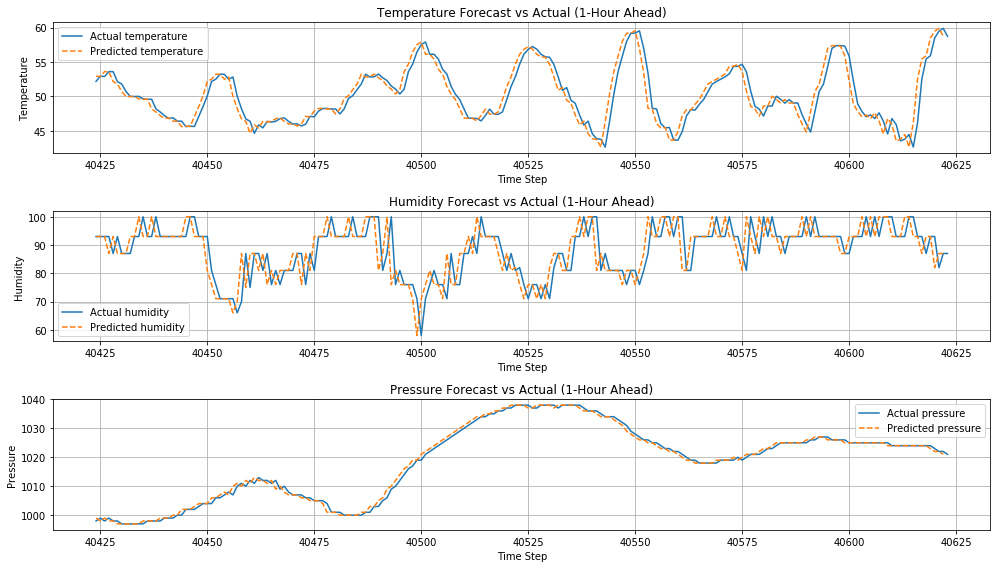

In [10]:
# Visualize predicted vs actual for multiple features

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data/weather.csv')

# Simulate 1-hour-ahead predictions
features = ['temperature', 'humidity', 'pressure']
for feat in features:
    df[f'predicted_{feat}'] = df[feat].shift(-1)

# Plot all three in separate subplots
plt.figure(figsize=(14, 8))

for i, feat in enumerate(features):
    plt.subplot(3, 1, i+1)
    plt.plot(df[feat][-200:], label=f'Actual {feat}')
    plt.plot(df[f'predicted_{feat}'][-200:], label=f'Predicted {feat}', linestyle='--')
    plt.title(f"{feat.capitalize()} Forecast vs Actual (1-Hour Ahead)")
    plt.xlabel("Time Step")
    plt.ylabel(feat.capitalize())
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()